In [1]:
import os
from os.path import join

def mkdir(dir):
    try:
        os.mkdir(dir)
    except Exception:
        print(f"{dir} already exists.")


original_dir = 'D:\\Images\\Data\\CatsVsDogs'
train_dir = join(original_dir, 'train')
train_dog_dir = join(train_dir, 'dog')
train_cat_dir = join(train_dir, 'cat')

test_dir = join(original_dir, 'test')
test_images_dir = join(test_dir, 'test_images')

validation_dir = join(original_dir, 'validation')
validation_dog_dir = join(validation_dir, 'dog')
validation_cat_dir = join(validation_dir, 'cat')

print(f'TRAINING cats images: {len(os.listdir(train_cat_dir))}')
print(f'TRAINING dogs images: {len(os.listdir(train_dog_dir))}')
print(f'TOTAL TRAINING:\t{len(os.listdir(train_cat_dir)) + len(os.listdir(train_dog_dir))}')

print(f'VALIDATION cats images: {len(os.listdir(validation_cat_dir))}')
print(f'VALIDATION dogs images: {len(os.listdir(validation_dog_dir))}')
print(f'TOTAL VALIDATION:\t{len(os.listdir(validation_cat_dir)) + len(os.listdir(validation_dog_dir))}')

print(f'TEST images: {len(os.listdir(test_images_dir))}')

TRAINING cats images: 10000
TRAINING dogs images: 10000
TOTAL TRAINING:	20000
VALIDATION cats images: 2500
VALIDATION dogs images: 2500
TOTAL VALIDATION:	5000
TEST images: 12500


In [2]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(200, 200, 3))
conv_base.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
______________________________________________

In [4]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    layer.trainable = set_trainable

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4718848   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 19,433,793
Trainable params: 11,798,529
Non-trainable params: 7,635,264
_________________________________________________________________


In [6]:
from tensorflow.keras import optimizers

opt = optimizers.RMSprop(lr=1e-5)

model.compile(loss='binary_crossentropy',
             optimizer=opt,
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1./255.,
                             rotation_range=40,
                             zoom_range = 0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=40,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=40,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=125)

Epoch 1/10
500/500 [==============================] - 195s 390ms/step - loss: 0.3062 - acc: 0.8644 - val_loss: 0.2723 - val_acc: 0.8830
Epoch 2/10
500/500 [==============================] - 190s 380ms/step - loss: 0.1911 - acc: 0.9212 - val_loss: 0.1755 - val_acc: 0.9306
Epoch 3/10
500/500 [==============================] - 185s 371ms/step - loss: 0.1629 - acc: 0.9342 - val_loss: 0.1496 - val_acc: 0.9396
Epoch 4/10
500/500 [==============================] - 186s 373ms/step - loss: 0.1456 - acc: 0.9386 - val_loss: 0.1498 - val_acc: 0.9418
Epoch 5/10
500/500 [==============================] - 184s 368ms/step - loss: 0.1354 - acc: 0.9455 - val_loss: 0.1456 - val_acc: 0.9422
Epoch 6/10
500/500 [==============================] - 186s 371ms/step - loss: 0.1219 - acc: 0.9503 - val_loss: 0.1388 - val_acc: 0.9472
Epoch 7/10
500/500 [==============================] - 190s 380ms/step - loss: 0.1167 - acc: 0.9534 - val_loss: 0.1253 - val_acc: 0.9494
Epoch 8/10
500/500 [============================

In [ ]:
model.save('cats_vs_dogs_best.h5')

In [ ]:
model.load_weights('cats_vs_dogs_best.h5')

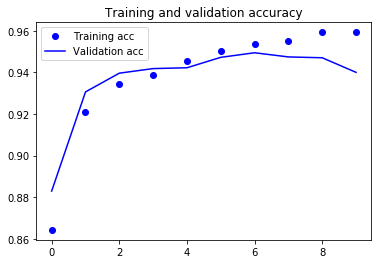

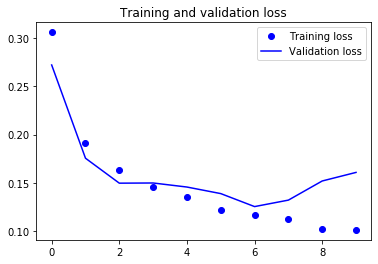

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [49]:
import numpy as np
import shutil
import pandas as pd

def get_classed_predictions(f, arr):
    return [labels[f(x)] for x in arr]

def give_class(pred):
    if pred < 0.4:
        return 0
    elif pred > 0.6:
        return 1
    else:
        return -1

test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(200, 200),
                                                  batch_size=100,
                                                  class_mode=None,
                                                  shuffle=False)
test_generator.reset()
preds = model.predict_generator(test_generator,
                                      steps=125,
                                      verbose=1)

Found 12500 images belonging to 1 classes.
125/125 [==============================] - 24s 191ms/step


In [50]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels.setdefault(-1, 'undefined')
filenames = test_generator.filenames
predicted_class_indices = [(x, v) for x, v in zip(filenames, get_classed_predictions(give_class, preds))]     

In [51]:
predictions_dir = join(original_dir, 'predictions')
predictions_dogs_dir = join(predictions_dir, 'dogs')
predictions_cats_dir = join(predictions_dir, 'cats')
predictions_undefined_dir = join(predictions_dir, 'undefined')
mkdir(predictions_dir)
mkdir(predictions_dogs_dir)
mkdir(predictions_cats_dir)
mkdir(predictions_undefined_dir)

D:\Images\Data\CatsVsDogs\predictions already exists.
D:\Images\Data\CatsVsDogs\predictions\dogs already exists.
D:\Images\Data\CatsVsDogs\predictions\cats already exists.
D:\Images\Data\CatsVsDogs\predictions\undefined already exists.


In [52]:
for (filename, prediction) in predicted_class_indices:
    print(filename, prediction)
    if prediction == 'dog':
        shutil.copyfile(join(test_dir, filename), join(predictions_dogs_dir, filename))
    elif prediction == 'cat':
        shutil.copyfile(join(test_dir, filename), join(predictions_cats_dir, filename))
    else:
        shutil.copyfile(join(test_dir, filename), join(predictions_undefined_dir, filename))

test_images\1.jpg dog
test_images\10.jpg cat
test_images\100.jpg undefined
test_images\1000.jpg dog
test_images\10000.jpg dog
test_images\10001.jpg cat
test_images\10002.jpg cat
test_images\10003.jpg dog
test_images\10004.jpg dog
test_images\10005.jpg cat
test_images\10006.jpg cat
test_images\10007.jpg cat
test_images\10008.jpg cat
test_images\10009.jpg cat
test_images\1001.jpg cat
test_images\10010.jpg dog
test_images\10011.jpg dog
test_images\10012.jpg cat
test_images\10013.jpg cat
test_images\10014.jpg cat
test_images\10015.jpg dog
test_images\10016.jpg dog
test_images\10017.jpg cat
test_images\10018.jpg cat
test_images\10019.jpg cat
test_images\1002.jpg dog
test_images\10020.jpg cat
test_images\10021.jpg cat
test_images\10022.jpg dog
test_images\10023.jpg dog
test_images\10024.jpg dog
test_images\10025.jpg dog
test_images\10026.jpg dog
test_images\10027.jpg dog
test_images\10028.jpg cat
test_images\10029.jpg dog
test_images\1003.jpg dog
test_images\10030.jpg dog
test_images\10031.j

test_images\10466.jpg dog
test_images\10467.jpg cat
test_images\10468.jpg cat
test_images\10469.jpg cat
test_images\1047.jpg cat
test_images\10470.jpg cat
test_images\10471.jpg cat
test_images\10472.jpg cat
test_images\10473.jpg dog
test_images\10474.jpg dog
test_images\10475.jpg cat
test_images\10476.jpg dog
test_images\10477.jpg cat
test_images\10478.jpg dog
test_images\10479.jpg dog
test_images\1048.jpg dog
test_images\10480.jpg cat
test_images\10481.jpg cat
test_images\10482.jpg cat
test_images\10483.jpg cat
test_images\10484.jpg dog
test_images\10485.jpg dog
test_images\10486.jpg cat
test_images\10487.jpg dog
test_images\10488.jpg dog
test_images\10489.jpg cat
test_images\1049.jpg cat
test_images\10490.jpg dog
test_images\10491.jpg cat
test_images\10492.jpg dog
test_images\10493.jpg undefined
test_images\10494.jpg dog
test_images\10495.jpg cat
test_images\10496.jpg dog
test_images\10497.jpg dog
test_images\10498.jpg cat
test_images\10499.jpg dog
test_images\105.jpg dog
test_images

test_images\10935.jpg dog
test_images\10936.jpg dog
test_images\10937.jpg dog
test_images\10938.jpg cat
test_images\10939.jpg cat
test_images\1094.jpg dog
test_images\10940.jpg dog
test_images\10941.jpg cat
test_images\10942.jpg cat
test_images\10943.jpg dog
test_images\10944.jpg cat
test_images\10945.jpg cat
test_images\10946.jpg dog
test_images\10947.jpg cat
test_images\10948.jpg dog
test_images\10949.jpg cat
test_images\1095.jpg dog
test_images\10950.jpg cat
test_images\10951.jpg dog
test_images\10952.jpg dog
test_images\10953.jpg cat
test_images\10954.jpg dog
test_images\10955.jpg cat
test_images\10956.jpg cat
test_images\10957.jpg dog
test_images\10958.jpg cat
test_images\10959.jpg dog
test_images\1096.jpg dog
test_images\10960.jpg cat
test_images\10961.jpg dog
test_images\10962.jpg dog
test_images\10963.jpg dog
test_images\10964.jpg cat
test_images\10965.jpg cat
test_images\10966.jpg dog
test_images\10967.jpg cat
test_images\10968.jpg dog
test_images\10969.jpg cat
test_images\109

test_images\11381.jpg cat
test_images\11382.jpg dog
test_images\11383.jpg dog
test_images\11384.jpg cat
test_images\11385.jpg dog
test_images\11386.jpg dog
test_images\11387.jpg dog
test_images\11388.jpg cat
test_images\11389.jpg cat
test_images\1139.jpg dog
test_images\11390.jpg cat
test_images\11391.jpg dog
test_images\11392.jpg cat
test_images\11393.jpg cat
test_images\11394.jpg dog
test_images\11395.jpg dog
test_images\11396.jpg cat
test_images\11397.jpg cat
test_images\11398.jpg dog
test_images\11399.jpg dog
test_images\114.jpg cat
test_images\1140.jpg cat
test_images\11400.jpg dog
test_images\11401.jpg cat
test_images\11402.jpg dog
test_images\11403.jpg cat
test_images\11404.jpg cat
test_images\11405.jpg cat
test_images\11406.jpg dog
test_images\11407.jpg cat
test_images\11408.jpg dog
test_images\11409.jpg cat
test_images\1141.jpg cat
test_images\11410.jpg cat
test_images\11411.jpg dog
test_images\11412.jpg dog
test_images\11413.jpg cat
test_images\11414.jpg cat
test_images\11415

test_images\11850.jpg dog
test_images\11851.jpg dog
test_images\11852.jpg dog
test_images\11853.jpg cat
test_images\11854.jpg cat
test_images\11855.jpg dog
test_images\11856.jpg cat
test_images\11857.jpg cat
test_images\11858.jpg cat
test_images\11859.jpg cat
test_images\1186.jpg dog
test_images\11860.jpg cat
test_images\11861.jpg dog
test_images\11862.jpg dog
test_images\11863.jpg dog
test_images\11864.jpg dog
test_images\11865.jpg cat
test_images\11866.jpg dog
test_images\11867.jpg dog
test_images\11868.jpg cat
test_images\11869.jpg dog
test_images\1187.jpg cat
test_images\11870.jpg dog
test_images\11871.jpg dog
test_images\11872.jpg cat
test_images\11873.jpg cat
test_images\11874.jpg dog
test_images\11875.jpg cat
test_images\11876.jpg cat
test_images\11877.jpg dog
test_images\11878.jpg dog
test_images\11879.jpg dog
test_images\1188.jpg dog
test_images\11880.jpg cat
test_images\11881.jpg dog
test_images\11882.jpg dog
test_images\11883.jpg dog
test_images\11884.jpg cat
test_images\118

test_images\12306.jpg cat
test_images\12307.jpg dog
test_images\12308.jpg cat
test_images\12309.jpg cat
test_images\1231.jpg dog
test_images\12310.jpg cat
test_images\12311.jpg dog
test_images\12312.jpg cat
test_images\12313.jpg dog
test_images\12314.jpg dog
test_images\12315.jpg dog
test_images\12316.jpg dog
test_images\12317.jpg cat
test_images\12318.jpg dog
test_images\12319.jpg cat
test_images\1232.jpg dog
test_images\12320.jpg dog
test_images\12321.jpg dog
test_images\12322.jpg dog
test_images\12323.jpg dog
test_images\12324.jpg dog
test_images\12325.jpg cat
test_images\12326.jpg cat
test_images\12327.jpg cat
test_images\12328.jpg dog
test_images\12329.jpg dog
test_images\1233.jpg cat
test_images\12330.jpg dog
test_images\12331.jpg cat
test_images\12332.jpg dog
test_images\12333.jpg dog
test_images\12334.jpg cat
test_images\12335.jpg cat
test_images\12336.jpg cat
test_images\12337.jpg dog
test_images\12338.jpg cat
test_images\12339.jpg cat
test_images\1234.jpg cat
test_images\1234

test_images\1534.jpg cat
test_images\1535.jpg cat
test_images\1536.jpg dog
test_images\1537.jpg dog
test_images\1538.jpg dog
test_images\1539.jpg cat
test_images\154.jpg cat
test_images\1540.jpg cat
test_images\1541.jpg dog
test_images\1542.jpg dog
test_images\1543.jpg dog
test_images\1544.jpg dog
test_images\1545.jpg undefined
test_images\1546.jpg dog
test_images\1547.jpg dog
test_images\1548.jpg cat
test_images\1549.jpg dog
test_images\155.jpg dog
test_images\1550.jpg cat
test_images\1551.jpg cat
test_images\1552.jpg cat
test_images\1553.jpg dog
test_images\1554.jpg dog
test_images\1555.jpg cat
test_images\1556.jpg cat
test_images\1557.jpg dog
test_images\1558.jpg cat
test_images\1559.jpg cat
test_images\156.jpg cat
test_images\1560.jpg dog
test_images\1561.jpg cat
test_images\1562.jpg dog
test_images\1563.jpg dog
test_images\1564.jpg dog
test_images\1565.jpg cat
test_images\1566.jpg cat
test_images\1567.jpg cat
test_images\1568.jpg dog
test_images\1569.jpg dog
test_images\157.jpg ca

test_images\2014.jpg cat
test_images\2015.jpg dog
test_images\2016.jpg cat
test_images\2017.jpg cat
test_images\2018.jpg cat
test_images\2019.jpg cat
test_images\202.jpg cat
test_images\2020.jpg cat
test_images\2021.jpg cat
test_images\2022.jpg cat
test_images\2023.jpg dog
test_images\2024.jpg cat
test_images\2025.jpg cat
test_images\2026.jpg dog
test_images\2027.jpg cat
test_images\2028.jpg cat
test_images\2029.jpg cat
test_images\203.jpg dog
test_images\2030.jpg cat
test_images\2031.jpg dog
test_images\2032.jpg cat
test_images\2033.jpg dog
test_images\2034.jpg cat
test_images\2035.jpg dog
test_images\2036.jpg cat
test_images\2037.jpg dog
test_images\2038.jpg dog
test_images\2039.jpg cat
test_images\204.jpg dog
test_images\2040.jpg dog
test_images\2041.jpg dog
test_images\2042.jpg dog
test_images\2043.jpg dog
test_images\2044.jpg cat
test_images\2045.jpg dog
test_images\2046.jpg dog
test_images\2047.jpg cat
test_images\2048.jpg cat
test_images\2049.jpg cat
test_images\205.jpg cat
test

test_images\2359.jpg dog
test_images\236.jpg dog
test_images\2360.jpg cat
test_images\2361.jpg dog
test_images\2362.jpg dog
test_images\2363.jpg cat
test_images\2364.jpg cat
test_images\2365.jpg dog
test_images\2366.jpg dog
test_images\2367.jpg cat
test_images\2368.jpg dog
test_images\2369.jpg cat
test_images\237.jpg cat
test_images\2370.jpg cat
test_images\2371.jpg cat
test_images\2372.jpg dog
test_images\2373.jpg dog
test_images\2374.jpg dog
test_images\2375.jpg cat
test_images\2376.jpg dog
test_images\2377.jpg cat
test_images\2378.jpg dog
test_images\2379.jpg cat
test_images\238.jpg dog
test_images\2380.jpg cat
test_images\2381.jpg dog
test_images\2382.jpg cat
test_images\2383.jpg dog
test_images\2384.jpg dog
test_images\2385.jpg dog
test_images\2386.jpg dog
test_images\2387.jpg cat
test_images\2388.jpg dog
test_images\2389.jpg dog
test_images\239.jpg cat
test_images\2390.jpg cat
test_images\2391.jpg dog
test_images\2392.jpg cat
test_images\2393.jpg dog
test_images\2394.jpg cat
test

test_images\2811.jpg cat
test_images\2812.jpg cat
test_images\2813.jpg dog
test_images\2814.jpg cat
test_images\2815.jpg cat
test_images\2816.jpg cat
test_images\2817.jpg cat
test_images\2818.jpg cat
test_images\2819.jpg cat
test_images\282.jpg dog
test_images\2820.jpg dog
test_images\2821.jpg cat
test_images\2822.jpg dog
test_images\2823.jpg cat
test_images\2824.jpg dog
test_images\2825.jpg cat
test_images\2826.jpg dog
test_images\2827.jpg dog
test_images\2828.jpg cat
test_images\2829.jpg dog
test_images\283.jpg cat
test_images\2830.jpg dog
test_images\2831.jpg cat
test_images\2832.jpg dog
test_images\2833.jpg dog
test_images\2834.jpg dog
test_images\2835.jpg dog
test_images\2836.jpg cat
test_images\2837.jpg cat
test_images\2838.jpg cat
test_images\2839.jpg undefined
test_images\284.jpg dog
test_images\2840.jpg cat
test_images\2841.jpg cat
test_images\2842.jpg dog
test_images\2843.jpg dog
test_images\2844.jpg dog
test_images\2845.jpg dog
test_images\2846.jpg dog
test_images\2847.jpg d

test_images\3258.jpg dog
test_images\3259.jpg cat
test_images\326.jpg dog
test_images\3260.jpg dog
test_images\3261.jpg dog
test_images\3262.jpg dog
test_images\3263.jpg cat
test_images\3264.jpg dog
test_images\3265.jpg cat
test_images\3266.jpg cat
test_images\3267.jpg cat
test_images\3268.jpg cat
test_images\3269.jpg dog
test_images\327.jpg dog
test_images\3270.jpg dog
test_images\3271.jpg cat
test_images\3272.jpg dog
test_images\3273.jpg dog
test_images\3274.jpg dog
test_images\3275.jpg cat
test_images\3276.jpg dog
test_images\3277.jpg dog
test_images\3278.jpg dog
test_images\3279.jpg dog
test_images\328.jpg dog
test_images\3280.jpg cat
test_images\3281.jpg cat
test_images\3282.jpg cat
test_images\3283.jpg cat
test_images\3284.jpg dog
test_images\3285.jpg cat
test_images\3286.jpg cat
test_images\3287.jpg dog
test_images\3288.jpg dog
test_images\3289.jpg cat
test_images\329.jpg cat
test_images\3290.jpg cat
test_images\3291.jpg dog
test_images\3292.jpg dog
test_images\3293.jpg dog
test

test_images\3677.jpg dog
test_images\3678.jpg cat
test_images\3679.jpg cat
test_images\368.jpg dog
test_images\3680.jpg dog
test_images\3681.jpg cat
test_images\3682.jpg dog
test_images\3683.jpg cat
test_images\3684.jpg dog
test_images\3685.jpg cat
test_images\3686.jpg cat
test_images\3687.jpg cat
test_images\3688.jpg dog
test_images\3689.jpg undefined
test_images\369.jpg dog
test_images\3690.jpg dog
test_images\3691.jpg cat
test_images\3692.jpg cat
test_images\3693.jpg dog
test_images\3694.jpg cat
test_images\3695.jpg cat
test_images\3696.jpg cat
test_images\3697.jpg dog
test_images\3698.jpg cat
test_images\3699.jpg cat
test_images\37.jpg cat
test_images\370.jpg dog
test_images\3700.jpg cat
test_images\3701.jpg dog
test_images\3702.jpg cat
test_images\3703.jpg cat
test_images\3704.jpg cat
test_images\3705.jpg cat
test_images\3706.jpg dog
test_images\3707.jpg dog
test_images\3708.jpg dog
test_images\3709.jpg dog
test_images\371.jpg dog
test_images\3710.jpg dog
test_images\3711.jpg dog


test_images\4152.jpg dog
test_images\4153.jpg cat
test_images\4154.jpg cat
test_images\4155.jpg dog
test_images\4156.jpg cat
test_images\4157.jpg cat
test_images\4158.jpg cat
test_images\4159.jpg cat
test_images\416.jpg cat
test_images\4160.jpg cat
test_images\4161.jpg dog
test_images\4162.jpg cat
test_images\4163.jpg cat
test_images\4164.jpg dog
test_images\4165.jpg dog
test_images\4166.jpg dog
test_images\4167.jpg cat
test_images\4168.jpg dog
test_images\4169.jpg cat
test_images\417.jpg dog
test_images\4170.jpg dog
test_images\4171.jpg dog
test_images\4172.jpg cat
test_images\4173.jpg dog
test_images\4174.jpg dog
test_images\4175.jpg dog
test_images\4176.jpg dog
test_images\4177.jpg dog
test_images\4178.jpg dog
test_images\4179.jpg dog
test_images\418.jpg dog
test_images\4180.jpg dog
test_images\4181.jpg cat
test_images\4182.jpg cat
test_images\4183.jpg cat
test_images\4184.jpg cat
test_images\4185.jpg cat
test_images\4186.jpg dog
test_images\4187.jpg cat
test_images\4188.jpg cat
tes

test_images\4633.jpg cat
test_images\4634.jpg cat
test_images\4635.jpg dog
test_images\4636.jpg dog
test_images\4637.jpg dog
test_images\4638.jpg cat
test_images\4639.jpg cat
test_images\464.jpg cat
test_images\4640.jpg dog
test_images\4641.jpg dog
test_images\4642.jpg dog
test_images\4643.jpg dog
test_images\4644.jpg cat
test_images\4645.jpg cat
test_images\4646.jpg dog
test_images\4647.jpg dog
test_images\4648.jpg cat
test_images\4649.jpg dog
test_images\465.jpg cat
test_images\4650.jpg dog
test_images\4651.jpg dog
test_images\4652.jpg dog
test_images\4653.jpg cat
test_images\4654.jpg dog
test_images\4655.jpg cat
test_images\4656.jpg dog
test_images\4657.jpg cat
test_images\4658.jpg cat
test_images\4659.jpg cat
test_images\466.jpg dog
test_images\4660.jpg cat
test_images\4661.jpg cat
test_images\4662.jpg cat
test_images\4663.jpg dog
test_images\4664.jpg dog
test_images\4665.jpg dog
test_images\4666.jpg dog
test_images\4667.jpg dog
test_images\4668.jpg dog
test_images\4669.jpg dog
tes

test_images\511.jpg dog
test_images\5110.jpg cat
test_images\5111.jpg dog
test_images\5112.jpg cat
test_images\5113.jpg dog
test_images\5114.jpg dog
test_images\5115.jpg undefined
test_images\5116.jpg dog
test_images\5117.jpg dog
test_images\5118.jpg dog
test_images\5119.jpg cat
test_images\512.jpg cat
test_images\5120.jpg dog
test_images\5121.jpg dog
test_images\5122.jpg cat
test_images\5123.jpg dog
test_images\5124.jpg cat
test_images\5125.jpg cat
test_images\5126.jpg cat
test_images\5127.jpg dog
test_images\5128.jpg dog
test_images\5129.jpg dog
test_images\513.jpg dog
test_images\5130.jpg dog
test_images\5131.jpg cat
test_images\5132.jpg cat
test_images\5133.jpg cat
test_images\5134.jpg cat
test_images\5135.jpg dog
test_images\5136.jpg cat
test_images\5137.jpg cat
test_images\5138.jpg cat
test_images\5139.jpg dog
test_images\514.jpg cat
test_images\5140.jpg undefined
test_images\5141.jpg dog
test_images\5142.jpg cat
test_images\5143.jpg dog
test_images\5144.jpg cat
test_images\5145.

test_images\5592.jpg dog
test_images\5593.jpg dog
test_images\5594.jpg dog
test_images\5595.jpg undefined
test_images\5596.jpg dog
test_images\5597.jpg dog
test_images\5598.jpg cat
test_images\5599.jpg cat
test_images\56.jpg dog
test_images\560.jpg dog
test_images\5600.jpg dog
test_images\5601.jpg dog
test_images\5602.jpg dog
test_images\5603.jpg cat
test_images\5604.jpg dog
test_images\5605.jpg cat
test_images\5606.jpg cat
test_images\5607.jpg dog
test_images\5608.jpg dog
test_images\5609.jpg cat
test_images\561.jpg cat
test_images\5610.jpg dog
test_images\5611.jpg cat
test_images\5612.jpg cat
test_images\5613.jpg dog
test_images\5614.jpg dog
test_images\5615.jpg cat
test_images\5616.jpg cat
test_images\5617.jpg dog
test_images\5618.jpg dog
test_images\5619.jpg dog
test_images\562.jpg cat
test_images\5620.jpg dog
test_images\5621.jpg cat
test_images\5622.jpg cat
test_images\5623.jpg cat
test_images\5624.jpg cat
test_images\5625.jpg dog
test_images\5626.jpg cat
test_images\5627.jpg cat

test_images\6068.jpg cat
test_images\6069.jpg dog
test_images\607.jpg dog
test_images\6070.jpg dog
test_images\6071.jpg cat
test_images\6072.jpg dog
test_images\6073.jpg dog
test_images\6074.jpg cat
test_images\6075.jpg dog
test_images\6076.jpg cat
test_images\6077.jpg cat
test_images\6078.jpg dog
test_images\6079.jpg dog
test_images\608.jpg dog
test_images\6080.jpg dog
test_images\6081.jpg cat
test_images\6082.jpg dog
test_images\6083.jpg cat
test_images\6084.jpg dog
test_images\6085.jpg dog
test_images\6086.jpg dog
test_images\6087.jpg dog
test_images\6088.jpg dog
test_images\6089.jpg dog
test_images\609.jpg cat
test_images\6090.jpg dog
test_images\6091.jpg dog
test_images\6092.jpg cat
test_images\6093.jpg dog
test_images\6094.jpg dog
test_images\6095.jpg cat
test_images\6096.jpg cat
test_images\6097.jpg cat
test_images\6098.jpg cat
test_images\6099.jpg cat
test_images\61.jpg cat
test_images\610.jpg dog
test_images\6100.jpg cat
test_images\6101.jpg dog
test_images\6102.jpg cat
test_i

test_images\6542.jpg dog
test_images\6543.jpg cat
test_images\6544.jpg dog
test_images\6545.jpg dog
test_images\6546.jpg dog
test_images\6547.jpg cat
test_images\6548.jpg cat
test_images\6549.jpg dog
test_images\655.jpg dog
test_images\6550.jpg cat
test_images\6551.jpg dog
test_images\6552.jpg dog
test_images\6553.jpg cat
test_images\6554.jpg dog
test_images\6555.jpg cat
test_images\6556.jpg dog
test_images\6557.jpg cat
test_images\6558.jpg cat
test_images\6559.jpg cat
test_images\656.jpg dog
test_images\6560.jpg dog
test_images\6561.jpg cat
test_images\6562.jpg cat
test_images\6563.jpg cat
test_images\6564.jpg dog
test_images\6565.jpg cat
test_images\6566.jpg dog
test_images\6567.jpg dog
test_images\6568.jpg cat
test_images\6569.jpg dog
test_images\657.jpg dog
test_images\6570.jpg cat
test_images\6571.jpg cat
test_images\6572.jpg dog
test_images\6573.jpg dog
test_images\6574.jpg dog
test_images\6575.jpg cat
test_images\6576.jpg cat
test_images\6577.jpg dog
test_images\6578.jpg undefin

test_images\7003.jpg cat
test_images\7004.jpg cat
test_images\7005.jpg cat
test_images\7006.jpg dog
test_images\7007.jpg cat
test_images\7008.jpg dog
test_images\7009.jpg cat
test_images\701.jpg cat
test_images\7010.jpg dog
test_images\7011.jpg cat
test_images\7012.jpg cat
test_images\7013.jpg dog
test_images\7014.jpg cat
test_images\7015.jpg cat
test_images\7016.jpg dog
test_images\7017.jpg dog
test_images\7018.jpg dog
test_images\7019.jpg cat
test_images\702.jpg cat
test_images\7020.jpg cat
test_images\7021.jpg cat
test_images\7022.jpg cat
test_images\7023.jpg cat
test_images\7024.jpg cat
test_images\7025.jpg cat
test_images\7026.jpg dog
test_images\7027.jpg cat
test_images\7028.jpg cat
test_images\7029.jpg cat
test_images\703.jpg cat
test_images\7030.jpg cat
test_images\7031.jpg dog
test_images\7032.jpg dog
test_images\7033.jpg cat
test_images\7034.jpg dog
test_images\7035.jpg dog
test_images\7036.jpg dog
test_images\7037.jpg dog
test_images\7038.jpg cat
test_images\7039.jpg dog
tes

test_images\7363.jpg cat
test_images\7364.jpg dog
test_images\7365.jpg dog
test_images\7366.jpg cat
test_images\7367.jpg dog
test_images\7368.jpg dog
test_images\7369.jpg cat
test_images\737.jpg cat
test_images\7370.jpg dog
test_images\7371.jpg dog
test_images\7372.jpg dog
test_images\7373.jpg undefined
test_images\7374.jpg dog
test_images\7375.jpg dog
test_images\7376.jpg undefined
test_images\7377.jpg cat
test_images\7378.jpg dog
test_images\7379.jpg dog
test_images\738.jpg dog
test_images\7380.jpg cat
test_images\7381.jpg cat
test_images\7382.jpg cat
test_images\7383.jpg cat
test_images\7384.jpg cat
test_images\7385.jpg cat
test_images\7386.jpg cat
test_images\7387.jpg cat
test_images\7388.jpg dog
test_images\7389.jpg cat
test_images\739.jpg dog
test_images\7390.jpg dog
test_images\7391.jpg cat
test_images\7392.jpg dog
test_images\7393.jpg dog
test_images\7394.jpg cat
test_images\7395.jpg dog
test_images\7396.jpg cat
test_images\7397.jpg cat
test_images\7398.jpg dog
test_images\7399

test_images\781.jpg dog
test_images\7810.jpg cat
test_images\7811.jpg dog
test_images\7812.jpg dog
test_images\7813.jpg dog
test_images\7814.jpg dog
test_images\7815.jpg dog
test_images\7816.jpg dog
test_images\7817.jpg dog
test_images\7818.jpg dog
test_images\7819.jpg cat
test_images\782.jpg dog
test_images\7820.jpg dog
test_images\7821.jpg cat
test_images\7822.jpg dog
test_images\7823.jpg dog
test_images\7824.jpg cat
test_images\7825.jpg cat
test_images\7826.jpg dog
test_images\7827.jpg dog
test_images\7828.jpg dog
test_images\7829.jpg dog
test_images\783.jpg dog
test_images\7830.jpg cat
test_images\7831.jpg cat
test_images\7832.jpg cat
test_images\7833.jpg cat
test_images\7834.jpg dog
test_images\7835.jpg dog
test_images\7836.jpg dog
test_images\7837.jpg dog
test_images\7838.jpg dog
test_images\7839.jpg dog
test_images\784.jpg dog
test_images\7840.jpg dog
test_images\7841.jpg cat
test_images\7842.jpg dog
test_images\7843.jpg dog
test_images\7844.jpg cat
test_images\7845.jpg dog
test

test_images\827.jpg cat
test_images\8270.jpg cat
test_images\8271.jpg dog
test_images\8272.jpg cat
test_images\8273.jpg cat
test_images\8274.jpg cat
test_images\8275.jpg cat
test_images\8276.jpg dog
test_images\8277.jpg cat
test_images\8278.jpg dog
test_images\8279.jpg dog
test_images\828.jpg dog
test_images\8280.jpg dog
test_images\8281.jpg dog
test_images\8282.jpg cat
test_images\8283.jpg dog
test_images\8284.jpg cat
test_images\8285.jpg dog
test_images\8286.jpg dog
test_images\8287.jpg dog
test_images\8288.jpg dog
test_images\8289.jpg cat
test_images\829.jpg dog
test_images\8290.jpg cat
test_images\8291.jpg dog
test_images\8292.jpg dog
test_images\8293.jpg cat
test_images\8294.jpg cat
test_images\8295.jpg cat
test_images\8296.jpg cat
test_images\8297.jpg cat
test_images\8298.jpg cat
test_images\8299.jpg cat
test_images\83.jpg dog
test_images\830.jpg cat
test_images\8300.jpg cat
test_images\8301.jpg dog
test_images\8302.jpg cat
test_images\8303.jpg dog
test_images\8304.jpg dog
test_i

test_images\8730.jpg dog
test_images\8731.jpg cat
test_images\8732.jpg dog
test_images\8733.jpg dog
test_images\8734.jpg cat
test_images\8735.jpg dog
test_images\8736.jpg dog
test_images\8737.jpg cat
test_images\8738.jpg cat
test_images\8739.jpg dog
test_images\874.jpg dog
test_images\8740.jpg dog
test_images\8741.jpg cat
test_images\8742.jpg dog
test_images\8743.jpg cat
test_images\8744.jpg cat
test_images\8745.jpg dog
test_images\8746.jpg dog
test_images\8747.jpg cat
test_images\8748.jpg cat
test_images\8749.jpg cat
test_images\875.jpg cat
test_images\8750.jpg cat
test_images\8751.jpg cat
test_images\8752.jpg cat
test_images\8753.jpg cat
test_images\8754.jpg cat
test_images\8755.jpg dog
test_images\8756.jpg dog
test_images\8757.jpg cat
test_images\8758.jpg dog
test_images\8759.jpg dog
test_images\876.jpg dog
test_images\8760.jpg cat
test_images\8761.jpg dog
test_images\8762.jpg dog
test_images\8763.jpg dog
test_images\8764.jpg cat
test_images\8765.jpg cat
test_images\8766.jpg cat
tes

test_images\9173.jpg dog
test_images\9174.jpg dog
test_images\9175.jpg dog
test_images\9176.jpg cat
test_images\9177.jpg dog
test_images\9178.jpg cat
test_images\9179.jpg dog
test_images\918.jpg dog
test_images\9180.jpg cat
test_images\9181.jpg dog
test_images\9182.jpg cat
test_images\9183.jpg cat
test_images\9184.jpg dog
test_images\9185.jpg dog
test_images\9186.jpg cat
test_images\9187.jpg dog
test_images\9188.jpg dog
test_images\9189.jpg dog
test_images\919.jpg dog
test_images\9190.jpg dog
test_images\9191.jpg dog
test_images\9192.jpg cat
test_images\9193.jpg dog
test_images\9194.jpg cat
test_images\9195.jpg cat
test_images\9196.jpg cat
test_images\9197.jpg cat
test_images\9198.jpg cat
test_images\9199.jpg dog
test_images\92.jpg cat
test_images\920.jpg cat
test_images\9200.jpg dog
test_images\9201.jpg cat
test_images\9202.jpg dog
test_images\9203.jpg cat
test_images\9204.jpg dog
test_images\9205.jpg cat
test_images\9206.jpg dog
test_images\9207.jpg dog
test_images\9208.jpg dog
test_

test_images\9575.jpg cat
test_images\9576.jpg dog
test_images\9577.jpg dog
test_images\9578.jpg cat
test_images\9579.jpg cat
test_images\958.jpg dog
test_images\9580.jpg cat
test_images\9581.jpg cat
test_images\9582.jpg cat
test_images\9583.jpg dog
test_images\9584.jpg dog
test_images\9585.jpg cat
test_images\9586.jpg cat
test_images\9587.jpg cat
test_images\9588.jpg cat
test_images\9589.jpg dog
test_images\959.jpg cat
test_images\9590.jpg cat
test_images\9591.jpg cat
test_images\9592.jpg cat
test_images\9593.jpg cat
test_images\9594.jpg dog
test_images\9595.jpg cat
test_images\9596.jpg cat
test_images\9597.jpg cat
test_images\9598.jpg dog
test_images\9599.jpg dog
test_images\96.jpg cat
test_images\960.jpg dog
test_images\9600.jpg cat
test_images\9601.jpg cat
test_images\9602.jpg dog
test_images\9603.jpg cat
test_images\9604.jpg dog
test_images\9605.jpg cat
test_images\9606.jpg dog
test_images\9607.jpg dog
test_images\9608.jpg dog
test_images\9609.jpg cat
test_images\961.jpg cat
test_i